In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
%matplotlib inline

In [4]:
#imports 2 data files with prcing data for Copper and the ECH fund
copper_data = pd.read_csv('/Users/david/Desktop/Copper_Futures_Historical_Data.csv')
ech_data = pd.read_csv('/Users/david/Desktop/ECH.csv')

#Merges them on the Date column
dataset = pd.merge(ech_data,copper_data,on="Date")

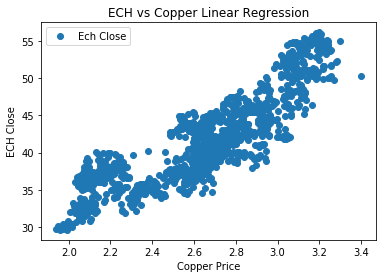

In [5]:
dataset.plot(x='Copper Price', y='Ech Close', style='o')  
plt.title('ECH vs Copper Linear Regression')  
plt.xlabel('Copper Price')  
plt.ylabel('ECH Close')
plt.show()

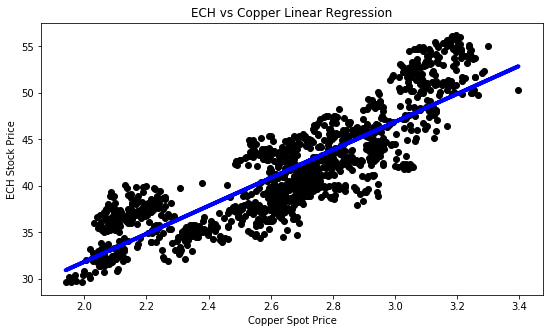

In [12]:
predictions = reg.predict(X)
plt.figure(figsize=(9, 5))
plt.scatter(x=dataset['Copper Price'],y=dataset['Ech Close'],c='black')
plt.plot(dataset['Copper Price'],predictions,c='blue',linewidth=4)
plt.xlabel("Copper Spot Price")
plt.ylabel("ECH Stock Price")
plt.title('ECH vs Copper Linear Regression')
plt.show()

In [11]:
X = dataset['Copper Price']
Y = dataset['Ech Close']
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2)
est2 = est.fit()
X = dataset['Copper Price'].values.reshape(-1,1)
Y = dataset['Ech Close'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X,Y)

print(est2.summary())
print('\n')
print("The linear model is: Y = {:.5} + {:.5}(X)".format(reg.intercept_[0], reg.coef_[0][0]))

                            OLS Regression Results                            
Dep. Variable:              Ech Close   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     3647.
Date:                Mon, 11 Nov 2019   Prob (F-statistic):               0.00
Time:                        17:35:21   Log-Likelihood:                -3141.9
No. Observations:                1258   AIC:                             6288.
Df Residuals:                    1256   BIC:                             6298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7197      0.665      2.586   

<h2>Based on this regression analysis, it can be concluded that the iShares MSCI Chile ETF (ECH) is highly correlated with the price of copper. The consenus outlook for 2020 copper prices is neutral to bearish and has copper prices trading in the range of 2.25 and 2.75. This weak copper price along with political unrest in Chile will continue to push ECH lower, as we can see political unrest is causing ECH to move lower over the past few weeks.<h2> 